## Add restriction site to a set of inserts

In some DNA assembly projects we want to make a high number of protein variants that differ in a small section only. These cannot be easily verified using restriction digestion, because the resultant fragments are very similar in size. This notebook makes a restriction site in our inserts to ensure that we get different fragments to the backbone if the insert is present.

In this example, we use **96 randomly generated sequences** and test the possibility of inserting an enzyme site for each of our **4 enzymes** using [DNA Chisel](https://github.com/Edinburgh-Genome-Foundry/dnachisel). Finally we **plot** the number of sequences covered by each enzyme, using a Venn diagram.

### 96 sequences

In [70]:
import dnachisel
import random

In [71]:
sequences = []
a = 10 + 2  # minimum peptide length + START/STOP codon which will be removed
b = 20 + 2  # maximum peptide length + START/STOP

for i in range(0, 96):
    length = random.randint(a, b)
    protein_sequence = dnachisel.biotools.random_protein_sequence(length)
    protein_sequence = protein_sequence[1:-1]  # M (START), STOP  
    seq = dnachisel.biotools.reverse_translate(protein_sequence)
    sequences.append(seq)

In [72]:
sequences

['AATTGGGATTGGGAATGTATTGAATGTCCTACTCATGTTAATACTACT',
 'GTTTATGATACTTTAACTGGTAATACTTAT',
 'TATACTGATGCTAAAGAATATATTCAAGTTAAACATACTATTCGTGCT',
 'TTTAAACATGCTAATTATGTTTATGAATAT',
 'GGTTCTGGTCAACCTAATTGGCATTTAATTGATTGTGTTATTGCTATT',
 'CATGCTGGTTGGCCTAATGAACAATCTGGTGAATTTTGTTGTGGTTTA',
 'GATCGTTTTACTAATTGGAAATGTGATGGTGAATCTAAATTACGT',
 'TTTGGTTATTATTGTATTTGGTCTTGGGCTGAATTTTCT',
 'TATACTATTTCTGCTTCTTATCCTCATCATCATCCTTCTGATACTGGTGTTTTT',
 'AAACGTCAATCTTCTGTTAAAGCTAAAAATCAAAATTCTCGTAATGTTGATGATTCT',
 'TGGGTTTATGCTAAATGGGAAAATTTTGGTGCTTGGGGTTTTGATACT',
 'GCTGCTGATAAACAAAATTTTGTTTGGGCTTCTATTGCTGATTATAAATTAGTTATT',
 'GGTGAATATTGGCATTCTTCTTATGAACGTGATACTGTTACTTATTGGAATACT',
 'CAATGTTGGGAACCTTTTACTTTATATTTTCAATTAACTATTTTTGATTATTGT',
 'CGTTGTTGTATTTATCAAACTACTCAATTATGGTGTGTT',
 'ATTAATTTTCGTATTTTACATTGGAATAAATCTGCTGATGTTCAT',
 'TGGGATGAAAATCATCCTTTAGATATTAAAGAACAATTA',
 'GTTGCTTGGGTTCCTGATTTTGAACGTAAA',
 'TTATGGTCTCATACTTGTTTAGGTATTAATCCTGCTACTGTTATTTGGCCTCGTTATTAT',
 'TATTTTACTGTTAATGATAATCATGATGCT

### Enzymes

In [129]:
enzymes = ["BamHI", "EcoRI",]  # "HindIII", "NotI"]

enzyme_lists = {}
errors = []

for enzyme in enzymes:
    enzyme_lists[enzyme] = []
    for seq in sequences:
        # Define DNA Chisel problem
        enzyme_site = dnachisel.EnzymeSitePattern(enzyme).sequence
        problem = dnachisel.DnaOptimizationProblem(
            sequence=seq,
            constraints = [
                dnachisel.EnforceTranslation(),
                dnachisel.builtin_specifications.EnforcePatternOccurence(pattern=enzyme_site),
            ],
            logger=None,
        )
        try:
            problem.resolve_constraints(final_check=True)
        except:
            errors.append("NoSolutionError in %s for %s" % (seq, enzyme))
        else:
            enzyme_lists[enzyme].append(seq)


In [130]:
errors[0:3]

['NoSolutionError in AATTGGGATTGGGAATGTATTGAATGTCCTACTCATGTTAATACTACT for BamHI',
 'NoSolutionError in GTTTATGATACTTTAACTGGTAATACTTAT for BamHI',
 'NoSolutionError in TATACTGATGCTAAAGAATATATTCAAGTTAAACATACTATTCGTGCT for BamHI']

In [131]:
import venn

In [132]:
solved_sequences = []
enzyme_sets = {}
for enzyme, value in enzyme_lists.items():
    enzyme_sets[enzyme] = set(value)
    solved_sequences = solved_sequences + value
    
enzyme_sets["No_solution"] = set(sequences) - set(solved_sequences)

In [133]:
enzyme_sets[enzyme]

{'AAACGTCAATCTTCTGTTAAAGCTAAAAATCAAAATTCTCGTAATGTTGATGATTCT',
 'ATTAATTTTCGTATTTTACATTGGAATAAATCTGCTGATGTTCAT',
 'CAAGAAAATTTTTTATATCGTATTCGTACTACTGGTTATGGTCAATCTGGT',
 'CATGCTGGTTGGCCTAATGAACAATCTGGTGAATTTTGTTGTGGTTTA',
 'GAATTTTCTCGTTGGGATGCTCAAATTTCTGAAGATCATTATGAACGTGGTTTTACT',
 'GCTGCTAATAATGCTGTTAAAGGTAATTCTTGTTTAGCTCCTTTAGCTGGTTGGGCTGGT',
 'GTTTCTGCTGTTAATTCTGGTTTTGAATTATTAGTT',
 'TGTATTGCTGAATTAGGTAATTCTATTGGTCAAGATACT',
 'TTTGGTTATTATTGTATTTGGTCTTGGGCTGAATTTTCT'}

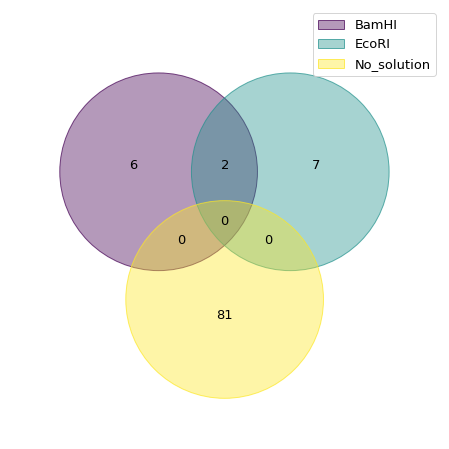

In [134]:
venn.venn(enzyme_sets)